In [1]:
#!/usr/bin/env python
# coding: utf-8

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2,gaussian_kde
np.random.seed(0)
df = 5
num_X = 1000
X = np.random.chisquare(df,num_X)

gaussian distribution

In [3]:
μ = np.mean(X)
σ = np.std(X)
print("Gaussian Mean : ",μ)
print("Guassian Sigma : ",σ)
def gaussian(μ,σ,x):
	return (np.exp(-(x-μ)**2/(2*σ**2))/(np.sqrt(2*np.pi)*σ))

Gaussian Mean :  4.9319561033936115
Guassian Sigma :  3.0232922401645794


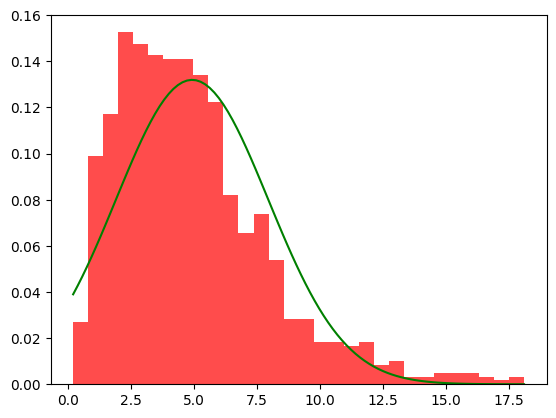

In [4]:
x = np.linspace(np.min(X),np.max(X),100)
y = gaussian(μ,σ,x)
plt.plot(x,y,color = 'green')
hist = plt.hist(X,bins = 30, alpha=0.7,color='red',density=True)

MLE distribution<br>
nitialize params<br>
first value in the params is μ and second value is σ

In [5]:
from autograd import grad
import autograd.numpy as np
n = len(X)
# take log of the function
# next take derivative of this log likelihood function
# this will give same value
def log_likelihood_gaussian(params):
	μ,σ = params
	return (-n/2)*np.log(2*np.pi*(σ)**2)-np.sum(((X-μ)**2)/(2*σ**2))

In [6]:
gradient = grad(log_likelihood_gaussian)

In [7]:
α = 0.001
num_iterations = 500
params = np.array([0.0,2.0])

In [8]:
for i in range(num_iterations):
	params = params + (α*gradient(params))

In [9]:
print("Estimated μ by Max-likelihood : ",params[0])
print("Estimated σ by Max-likelihood : ",params[1])

Estimated μ by Max-likelihood :  4.931956103393609
Estimated σ by Max-likelihood :  3.0232922401645803


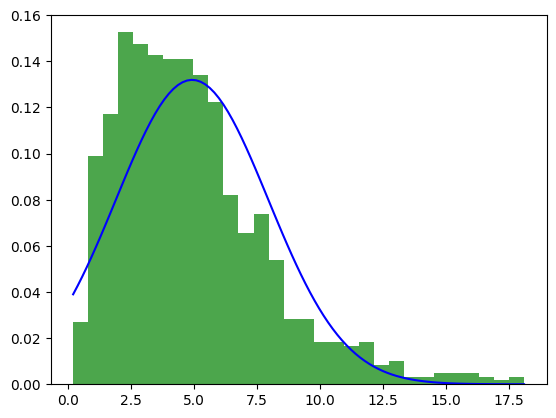

In [10]:
x = np.linspace(np.min(X),np.max(X),100)
y = gaussian(params[0],params[1],x)
plt.plot(x,y,color='blue')
hist = plt.hist(X,bins=30,alpha = 0.7,density=True,color='green')

KDE sampling

In [11]:
pdf = 0
σ = 0.4
x = np.linspace(np.min(X),np.max(X),100)
for i in range(n):
	pdf += gaussian(X[i],σ,x)
pdf = pdf/n

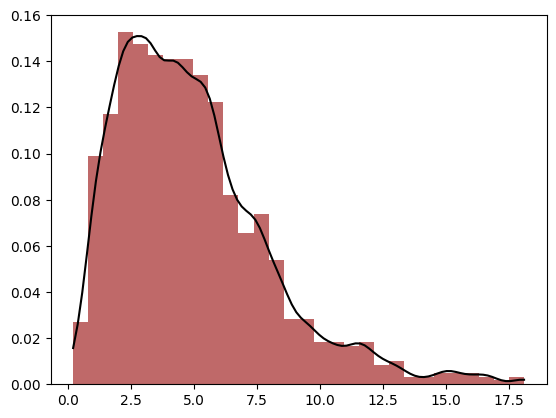

In [12]:
plt.hist(X,bins=30, alpha=0.7,color='brown',density=True)
plt.plot(x,pdf,color='black')